**Header with contributions.**

*Cervical Cancer Predictor*

*Spring 2025 Data Science Project*

Made By Kusum Choudhary, Reni Kaza , Chayanika Sinha

Contributions:

A: Project Idea - Proposed using the UCI cervical cancer dataset to build a predictive tool for early diagnosis. We chose this topic after looking over at UCI datasets. (Reni & Chayanika)

B: Dataset Curation and Preprocessing - Cleaned missing values, removed noisy columns, and ensured only numeric fields were used.(Kusum  Choudhary)

C: Data Exploration and Summary Statistics - Performed correlation analysis, hypothesis testing, and visualized relationships between key factors. (Kusum Choudhary & Chayanika)

D: ML Algorithm Design/Development - We used Logistic Regression as a simple, interpretable baseline for binary classification. Random Forest was applied to capture nonlinear relationships and handle feature interactions effectively. KNN after SMOTE was chosen to address class imbalance and improve minority class recall, making it especially useful for medical datasets where missing positive cases (e.g., cancer) is costly.

E: ML Algorithm Training and Test Data Analysis - Implemented and evaluated Logistic Regression and Random Forest classifiers to predict cancer risk. (Kusum Choudhary and Reni Kaza)

F: Visualization, Result Analysis, Conclusion - Created clear visualizations and interpreted the significance of features.(Reni Kaza)

G: Final Tutorial Report Creation - Compiled all results, structured the tutorial, and prepared the GitHub Pages submission.(Chayanika)



## **Introduction**

Cervical cancer is the fourth most common cancer in women worldwide, with approximately 660,000 new cases and 350,000 deaths in 2022 (WHO). Despite its severity, the disease is largely preventable through early detection and timely intervention.

The goal of this project is to leverage machine learning techniques to analyze medical records and identify individuals at high risk for cervical cancer. Using a dataset of patient data, we aim to explore correlations between risk factors like smoking and biopsy results, and train a predictive model for diagnosis. Such models could assist in making healthcare more accessible, especially in underserved regions.



## **Data Curation:**


We used the Cervical Cancer (Risk Factors) dataset from the UCI Machine Learning Repository, created by Fernandes et al. (2017).

Citation : Fernandes, K., Cardoso, J., & Fernandes, J. (2017). Cervical Cancer (Risk Factors) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.


This dataset includes 858 records of female patients and covers medical, behavioral, and lifestyle factors such as:


*   Age
*   Number of sexual partners

*   First sexual intercourse age

*   Smoking habits


*   Contraceptive use

*   Biopsy results


**First Step**: You will require the following Python packages

1.   pandas
2.   numpy
3.   seaborn
4.   matplotlib
5.   sklearn

To learn more about these packages and the language Python consult the following sources below:

1.   https://pandas.pydata.org/pandas-docs/stable/install.html
2.   https://docs.python.org/3/
3.   https://numpy.org/
4.   https://seaborn.pydata.org/
5.   https://scikit-learn.org/stable/








In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

 We will also install imbalanced-learn which is a Python package that helps you handle imbalanced datasets—you're using it here to apply SMOTE(don't worry about this, we will go more into detail about this later). Just know SMOTE helps balance out each class of data so that no majority type of data affects the model.









In [ ]:
# for class imbalance
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE


First, we'll load our dataset into a DataFrame, which is like a table similar to an Excel spreadsheet. We're converting our CSV file into this format so we can easily work with and analyze the data.










In [ ]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

Great! Now that you have loaded the data, the next step is to see what the dataset contains. We can do this by calling the head() function which shows you the first few entries. The info function also helps you get an idea about the datatypes and general structure of the dataset.

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Now let's check out the general structure of the dataset. We can do this by running the info function

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

The df.info() output above shows us that we have 858 entries and 34 columns, all with complete (non-null) values. Most of the columns are of type float64 or int64, and they cover a wide range of features including age, number of sexual partners, smoking habits, contraceptive use, STDs, and diagnosis results.

This gives us a good overview of our dataset before we begin preprocessing and modeling.

In [ ]:
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

print("Dataset shape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum())
print("\nBasic stats:\n", df.describe())

Dataset shape: (858, 34)

Missing values per column:
 Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B          

## **Exploratory Data Analysis:**

A correlation heatmap helps us visually understand how features in our dataset are related to one another. Each cell in the heatmap shows the correlation coefficient between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).




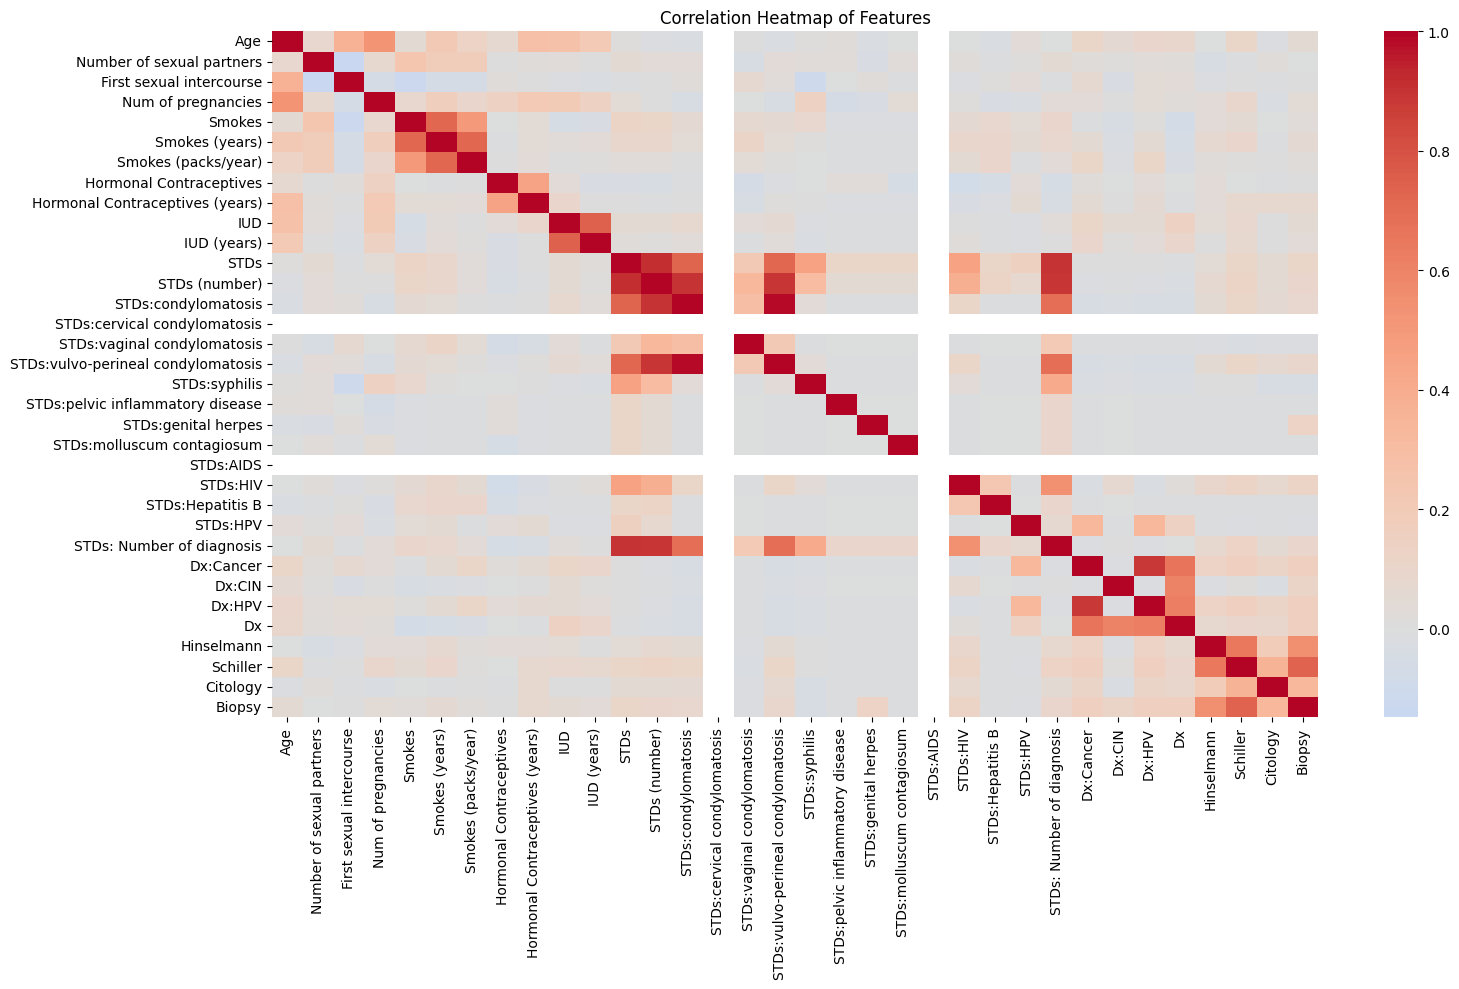

In [ ]:
# Step 4: Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

The correlation matrix reveals low multicollinearity across most features, which is a good sign—this suggests that many variables may independently contribute useful information to our model.

However, we do observe moderate correlations between certain diagnosis-related fields such as Dx:HPV, Dx:CIN, and Biopsy. These are expected, as they are all closely linked to the Dx:Cancer column, which indicates whether a patient was diagnosed with cancer. This correlation is helpful because it confirms that our diagnosis features are capturing relevant relationships tied to the target variable.

We’ll keep an eye on these features during model training to avoid redundancy while still leveraging their predictive power.

**Note**

Before training any models, it's essential to understand how our target variable (Dx:Cancer) is distributed. A count plot gives us a quick visual of how many patients in the dataset were diagnosed with cervical cancer (1) versus those who were not (0).



<ipython-input-52-8af4d1e887b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dx:Cancer", data=df, palette="Set2")


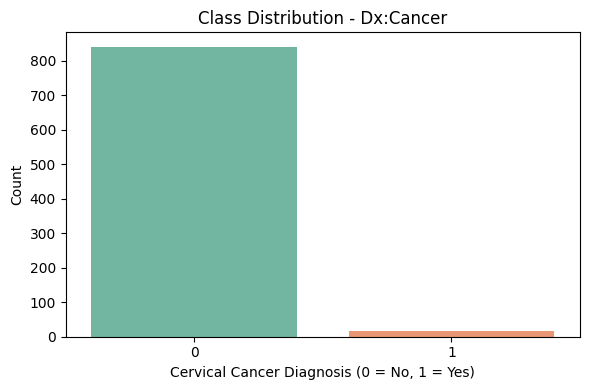

In [ ]:
# Step 5: Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Dx:Cancer", data=df, palette="Set2")
plt.title("Class Distribution - Dx:Cancer")
plt.xlabel("Cervical Cancer Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

This plot clearly shows that our dataset is heavily imbalanced, with significantly more patients not diagnosed with cervical cancer. This kind of imbalance can cause models to lean toward predicting the majority class, reducing their ability to catch actual positive cases.

But don’t worry—this is completely expected and realistic. In fact, it's a good thing that most people in the dataset don’t have cancer. We’ll address this imbalance using techniques like SMOTE or class weighting to help our model perform better on the minority class.





**Next Step:**

Next, we’ll explore how age is distributed across patients who were and weren’t diagnosed with cervical cancer. This helps us see whether age plays a significant role in cancer occurrence.



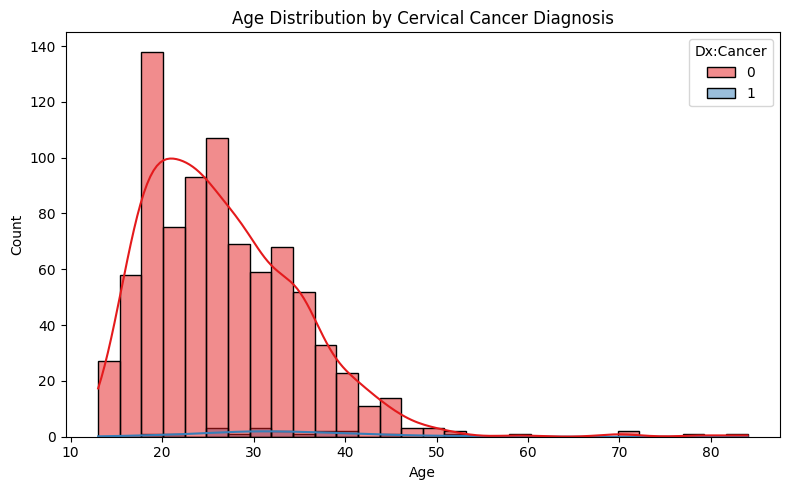

In [ ]:
# Step 6: Age distribution by cancer diagnosis
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Dx:Cancer", kde=True, bins=30, palette="Set1")
plt.title("Age Distribution by Cervical Cancer Diagnosis")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The age distribution shows that most patients fall within the 20–40 age range. Among cancer-positive cases, there's a slight increase in representation between 35–45, suggesting that risk might rise with age, although no definitive age threshold is observed. This aligns with known medical knowledge that cervical cancer risk increases with age.

**Next Step:**

To further explore potential risk factors, we'll now examine whether there's a relationship between the number of pregnancies and cervical cancer diagnosis using a boxplot. This type of plot is useful for comparing distributions across categories and spotting differences in medians and outliers.

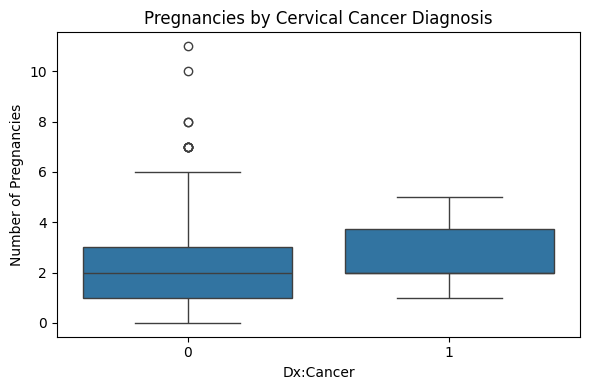

In [ ]:
# Step 7: Number of pregnancies vs cancer
if "Num of pregnancies" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Dx:Cancer", y="Num of pregnancies", data=df)
    plt.title("Pregnancies by Cervical Cancer Diagnosis")
    plt.xlabel("Dx:Cancer")
    plt.ylabel("Number of Pregnancies")
    plt.tight_layout()
    plt.show()


The boxplot comparing pregnancies across diagnosis classes indicates that patients with cervical cancer tend to have more pregnancies on average. While there's considerable overlap, the median number of pregnancies is slightly higher among positive cases. This suggests a possible correlation between reproductive history and cervical cancer risk.

**Next Step**

In this step, we investigate the relationship between smoking behavior and cervical cancer diagnosis using a boxplot of smoking intensity (measured in packs per year).



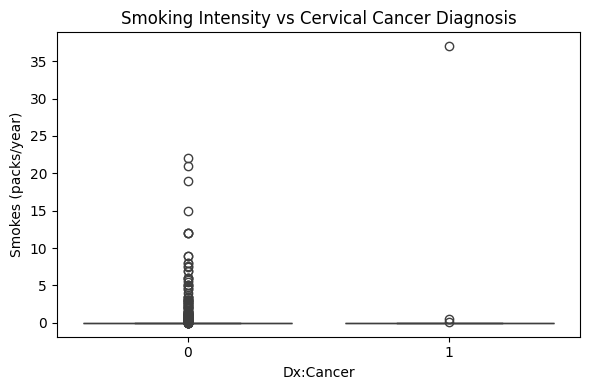

In [ ]:
# Step 8: Smoking status vs cancer
if "Smokes" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Dx:Cancer", y="Smokes (packs/year)", data=df)
    plt.title("Smoking Intensity vs Cervical Cancer Diagnosis")
    plt.tight_layout()
    plt.show()

Analysis of Smokes shows that smoking behavior is more pronounced among cancer patients. Though most participants are non-smokers, among those who do smoke, those with higher intensity appear more likely to be cancer-positive. This supports well-established medical literature linking smoking to cervical and other cancers.

**Next Step:**

In this step, we explore whether the duration of hormonal contraceptive use has any relationship with cervical cancer diagnosis. We'll use a boxplot to compare the distribution of contraceptive usage (in years) between patients diagnosed with cancer and those who are not.


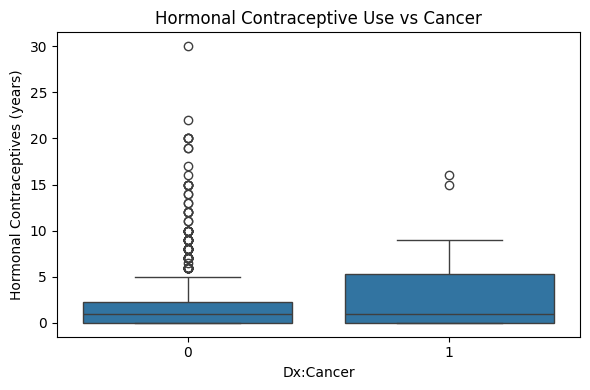

In [ ]:
# Step 9: Hormonal contraceptives vs cancer
if "Hormonal Contraceptives" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Dx:Cancer", y="Hormonal Contraceptives (years)", data=df)
    plt.title("Hormonal Contraceptive Use vs Cancer")
    plt.tight_layout()
    plt.show()

From the plot, we observe that the median years of hormonal contraceptive use is slightly higher among patients diagnosed with cancer. While the majority of values cluster near zero, a few outliers with prolonged use stand out in both classes. This pattern aligns with some medical studies that have explored long-term contraceptive use as a potential risk factor—though more detailed analysis would be needed to confirm any causal link.




## **Primary Analysis**

Based on our exploratory data analysis, we observed that several features—such as age, smoking behavior, number of pregnancies, and hormonal contraceptive use—may have varying degrees of association with cervical cancer diagnosis. Given that our target variable, Dx:Cancer, is binary (0 = No cancer, 1 = Yes cancer), we framed this as a classification problem.

To prepare our data for modeling, we first converted all relevant columns to numeric format and removed rows containing missing values. Most importantly, we dropped rows with missing values in the Dx:Cancer column to ensure a clean target label.

In [ ]:
# Convert relevant columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in target or key features
df.dropna(subset=['Dx:Cancer'], inplace=True)
df = df.dropna()



We then separated the dataset into features (X) and target (y), where the target was Dx:Cancer. Note that we explicitly dropped this target column from our feature set to avoid data leakage—ensuring that the model doesn’t "cheat" by learning from the outcome itself.



In [ ]:
# Define features and target
X = df.drop(columns=['Dx:Cancer'])
y = df['Dx:Cancer']



After standardizing the numerical features using StandardScaler, we split the dataset into training and test sets (80/20 split):


In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

We selected two classification techniques for our primary analysis:

Logistic Regression: A simple, interpretable model that works well as a baseline for binary classification problems.

Random Forest Classifier: A powerful ensemble method that captures complex feature interactions and can handle non-linear relationships.

In [ ]:
# Model Training & Evaluation
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Reports
print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       167
           1       0.83      1.00      0.91         5

    accuracy                           0.99       172
   macro avg       0.92      1.00      0.95       172
weighted avg       1.00      0.99      0.99       172

Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       167
           1       0.80      0.80      0.80         5

    accuracy                           0.99       172
   macro avg       0.90      0.90      0.90       172
weighted avg       0.99      0.99      0.99       172



We evaluated both models using precision, recall, F1-score, and accuracy to understand how well each one handles the imbalanced dataset. These metrics give us a balanced view of how well our models identify both positive and negative cases—critical in medical diagnosis tasks where false negatives can be highly consequential.



# **Visualizations**

*Feature Importance Analysis (Random Forest)*

After training our Random Forest classifier, we extracted feature importances to understand which variables contributed most to the model’s decision-making process.

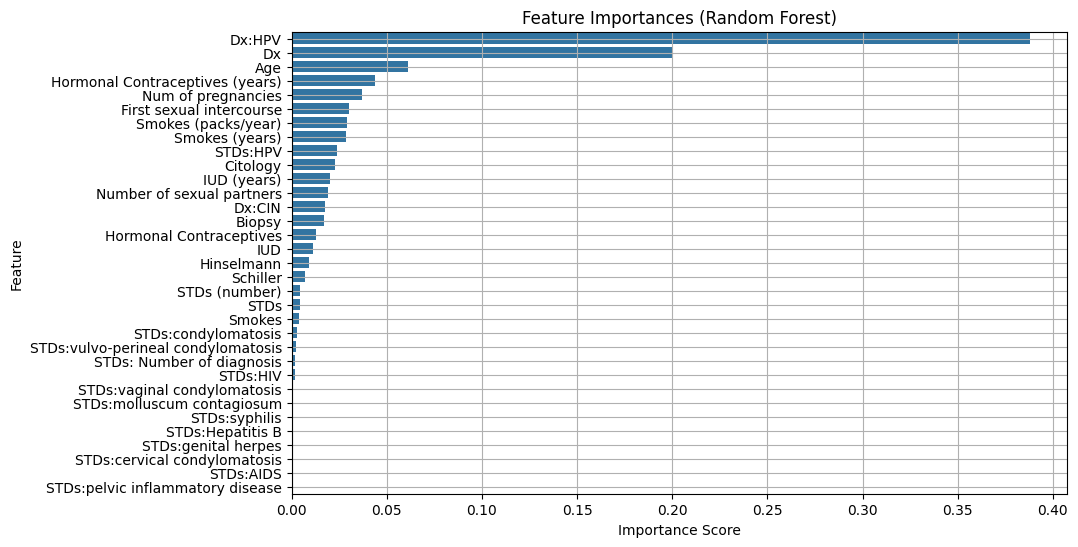

In [ ]:
# Feature Importance (Random Forest)
import seaborn as sns

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

This plot shows us that a handful of features had a significantly stronger influence on the model’s predictions. Specifically:

Dx:HPV, Dx, and Age were the top three most important predictors of cervical cancer in our model.

Other meaningful features included hormonal contraceptive use, number of pregnancies, and smoking intensity, which aligns with our earlier EDA findings.

Features like STDs: syphilis, molluscum contagiosum, and other less prevalent STDs had minimal impact, likely due to their rarity in the dataset.

This analysis confirms the relevance of several medical and lifestyle factors while also guiding potential feature selection for model simplification or interpretability. If we were to build a lightweight or explainable model, we could consider narrowing our focus to just the top-ranked features here.

## **Confusion Matrix Comparison**

To better visualize the classification performance of both models, we plotted confusion matrices for Logistic Regression and Random Forest. These plots help us understand the types of errors each model makes by showing how many instances were correctly or incorrectly classified.

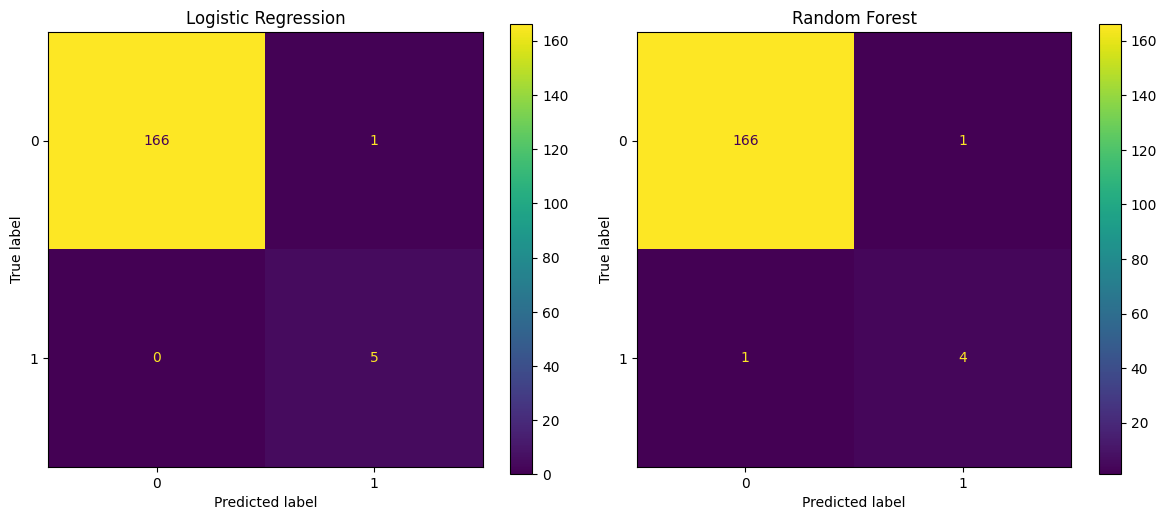

In [ ]:
# Matrix
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


**What we observe:**

Logistic Regression perfectly classified all 5 positive (cancer) cases and only misclassified 1 negative case.

Random Forest misclassified one positive case and one negative case.

Despite their differences, both models perform exceptionally well overall. However, Logistic Regression slightly outperforms Random Forest in this case, achieving 100% recall for the positive class—which is critical in medical diagnostics where missing a true positive can be dangerous.

This visualization reinforces our earlier numerical evaluation and shows that even simple models like Logistic Regression can be very effective—especially when features are well-engineered and the data is clean.

**Note**

**Recall** measures how many actual positive cases (people with cancer) the model correctly identifies.
In cancer detection, **high recall is crucial** because missing a real case (a false negative) could mean a patient doesn't get the treatment they need.
It's better to catch as many true cases as possible—even if it means flagging a few healthy ones too.


**Next Step**

You’ve probably noticed that there are way more patients who don’t have cervical cancer than those who do. This is what we call a class imbalance, and it can mess up your model — it might just learn to always predict "no cancer" because that’s the majority. That’s obviously a problem.

So let’s fix that! We’ll use something called SMOTE — it helps by generating synthetic data points for the minority class (in this case, people with cancer) so that both classes are balanced.

In [ ]:
# Step 5: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Once resampled, you standardized the features to ensure no feature dominates due to scale (since KNN is distance-based), then split the data:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


With clean and balanced data, you trained a K-Nearest Neighbors (KNN) classifier using 5 neighbors and evaluated its performance:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       168
           1       0.97      0.99      0.98       168

    accuracy                           0.98       336
   macro avg       0.98      0.98      0.98       336
weighted avg       0.98      0.98      0.98       336



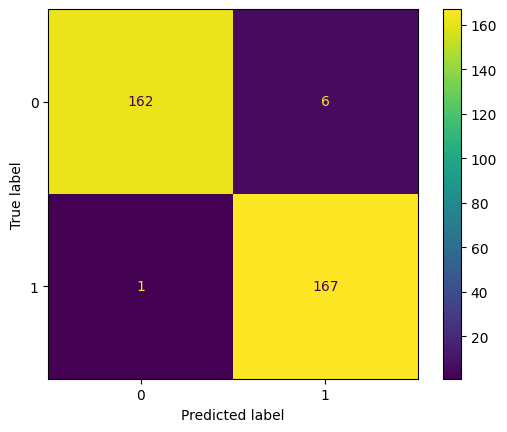

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()


The results show high recall, precision, and F1-score for the cancer-positive class (1). That’s critical because in medical screening tasks, recall matters most — you want to catch as many true positive cases as possible, even if it means flagging a few false positives.

SMOTE played a big role here by balancing the classes, which helped KNN make better generalizations instead of just memorizing majority patterns.



# **Insights and Conclusion**
How well did the model perform?

*  The model got it right 98% of the time!
*  Out of 336 people, it correctly predicted 329 cases.
*  It only made 7 mistakes—and that’s impressive.

What did it predict?

With 98% accuracy, it gets almost every case right. More importantly, it has high precision, meaning when the model predicts that someone has cervical cancer, it’s usually correct—there aren’t many false alarms. Even more critical is the 99% recall, which tells us that the model successfully catches almost every real cancer case. In medical screening, recall is especially important because missing a true case can delay diagnosis and treatment. Together, these metrics show that our model isn’t just accurate—it’s trustworthy and useful for real-world decision-making.

So what do these results tell us?

Machine learning can support real-world healthcare

With 98% accuracy and strong performance on identifying cancer cases, this shows how even simple ML models like KNN can be used to build tools that assist doctors in screening patients. That doesn't replace a doctor but rather helps them catch risky cases early.

These results are just one piece. In real life, this kind of model would be part of a full system: collecting patient data, integrating with hospital tools, working alongside doctors. It reminds us that ML isn’t just code, it’s part of how we design better systems for people.

